# Path finding using reinforcement learning

### Problem
This is layout of a house. Rooms are numbered from 1 to 4 and lawn is numbered as 5. Room 1 and 4 has direct connection to the lawn. Agent needs find best route to go to the lawn.
<img src='RL_Fig.gif'>

This room layout can be shown as a graph as below. As room 1 and 4 connected to lawn 5, weight of edge (1, 5) and (4, 5) are 100. Additionally, the lawn is so pleasing that if agent reaches lawn it does not want to go back into the house. Therefore, edge(5, 5) is also gets a reward 100.
<img src='RL_graph.gif'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Reward matrix is:

In [2]:
R = np.matrix([[-1, -1, -1, -1,  0,  -1],
               [-1, -1, -1,  0, -1, 100],
               [-1, -1, -1,  0, -1,  -1],
               [-1,  0,  0, -1,  0,  -1],
               [-1,  0,  0, -1, -1, 100],
               [-1,  0, -1, -1,  0, 100]])

Initialize Q matrix with zeros

In [3]:
Q = np.matrix(np.zeros([6, 6]))
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [4]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [5]:
def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

In [6]:
def update_Q(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma*max_value
    
    # normalize Q value
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

### Training the model

In [7]:
gamma = 0.8
N = 2000

In [8]:
scores = []
for i in range(N):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update_Q(current_state, action, gamma)
    scores.append(score)

# normalize Q value
Q/np.max(Q)*100

matrix([[  0. ,   0. ,   0. ,   0. ,  80. ,   0. ],
        [  0. ,   0. ,   0. ,  64. ,   0. , 100. ],
        [  0. ,   0. ,   0. ,  64. ,   0. ,   0. ],
        [  0. ,  80. ,  51.2,   0. ,  80. ,   0. ],
        [  0. ,  80. ,  51.2,   0. ,   0. , 100. ],
        [  0. ,  80. ,   0. ,   0. ,  80. , 100. ]])

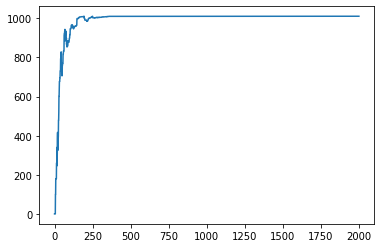

In [9]:
# convergence of the Q value
plt.plot(scores)
plt.show()

### Policy extraction

In [10]:
def model_test(current_state):
    steps = [current_state]

    while current_state != 5:
        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size=1))
        else:
            next_step_index = int(next_step_index)

        steps.append(next_step_index)
        current_state = next_step_index

    return steps

In [11]:
model_test(0)

[0, 4, 5]

In [12]:
model_test(1)

[1, 5]

In [13]:
model_test(2)

[2, 3, 4, 5]

In [14]:
model_test(3)

[3, 4, 5]

In [15]:
model_test(4)

[4, 5]

In [16]:
model_test(5)

[5]

### References:

https://www.youtube.com/watch?v=LzaWrmKL1Z4 
    
http://mnemstudio.org/path-finding-q-learning-tutorial.htm  
    
http://firsttimeprogrammer.blogspot.com/2016/09/getting-ai-smarter-with-q-learning.html 